#Peeking into the dataset

Here's me getting the data into the notebook and importing pandas

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/GGC-DSA/health-status-prediction/main/datasets/heart.csv'
df = pd.read_csv(url)

Here a sneak peak into the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#Cleaning the dataset

Here, I am removing columns that will become unneeded when all the datasets are merged together.

In [3]:
df2 = df.drop(['fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 
               'thal', 'cp'], axis = 1)

Here, I am renaming a few columns so that they are easier to understand

In [4]:
df2 = df2.rename(columns = {'trestbps' : 'blood pressure', 
                            'chol' : 'cholesterol', 'target' : 'diagnosis'})

And now, to make sure the changes went through

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             303 non-null    int64
 1   sex             303 non-null    int64
 2   blood pressure  303 non-null    int64
 3   cholesterol     303 non-null    int64
 4   diagnosis       303 non-null    int64
dtypes: int64(5)
memory usage: 12.0 KB


#Statistics / Visualizations on the dataset

##Averages

First, I wanted to know, then show, the average age, blood pressure, and cholesterol of people in the dataset.

In [6]:
avgAge = round(df2['age'].mean())
avgBP = round(df2['blood pressure'].mean())
avgChol = round(df2['cholesterol'].mean())

In [7]:
avgDF = pd.DataFrame({'labels' : ['Age', 'Blood Pressure', 'Cholesterol'], 'Averages' : [avgAge, avgBP, avgChol]})
avgDF

,labels,Averages
0,Age,54
1,Blood Pressure,132
2,Cholesterol,246


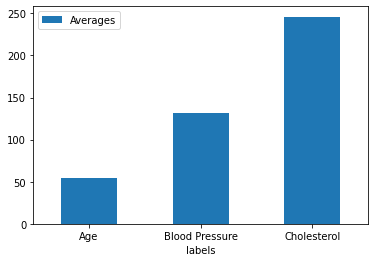

In [8]:
avgDF = pd.DataFrame({'labels' : ['Age', 'Blood Pressure', 'Cholesterol'], 'Averages' : [avgAge, avgBP, avgChol]})
avgDF.plot.bar(y = 'Averages', x = 'labels', rot = 0)

##Other Statistics

In [9]:
#finding the mode
df2.mode()

,age,sex,blood pressure,cholesterol,diagnosis
0,58.0,1.0,120.0,197,1.0
1,NaN,NaN,NaN,204,NaN
2,NaN,NaN,NaN,234,NaN


In [10]:
#finding the standard deviation
df2.std()

age                9.082101
sex                0.466011
blood pressure    17.538143
cholesterol       51.830751
diagnosis          0.498835
dtype: float64

In [11]:
#finding the variance
df2.var()

age                 82.484558
sex                  0.217166
blood pressure     307.586453
cholesterol       2686.426748
diagnosis            0.248836
dtype: float64

In [12]:
#finding the correlation coefficient 
df2.corr()

,age,sex,blood pressure,cholesterol,diagnosis
age,1.000000,-0.098447,0.279351,0.213678,-0.225439
sex,-0.098447,1.000000,-0.056769,-0.197912,-0.280937
blood pressure,0.279351,-0.056769,1.000000,0.123174,-0.144931
cholesterol,0.213678,-0.197912,0.123174,1.000000,-0.085239
diagnosis,-0.225439,-0.280937,-0.144931,-0.085239,1.000000


##Other Visualizations

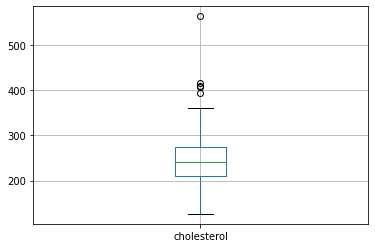

In [13]:
df2.boxplot(column = ['cholesterol'])

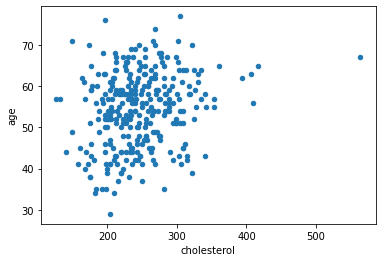

In [14]:
#scatterplot comparing age and cholesterol
df2.plot.scatter(x = 'cholesterol', y = 'age')

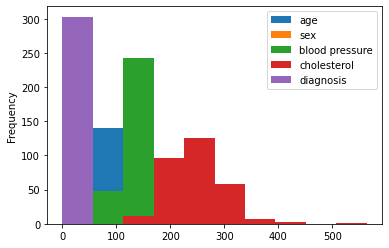

In [15]:
#Your everyday histogram
df2.plot.hist()

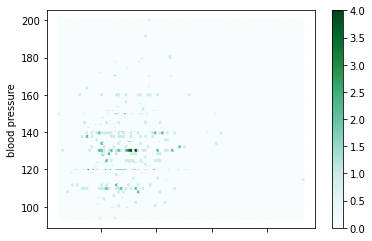

In [16]:
df2.plot.hexbin(x = 'cholesterol', y = 'blood pressure')

# PCA

In [17]:
# creating another dataframe so that I can download the clean version of the data later
# and put it onto github. Some code is borrowed from https://tinyurl.com/4mnvsdfs
# The following lines of code show me creating a new dataframe with either "yes"
# or "no" instead of 1's or 0's as values in the diagnosis column
df3 = df2
df3 = df3.astype({"diagnosis" : str})
df3['diagnosis'] = df3['diagnosis'].replace(['1','0'],['yes','no'])

#these lines of code officially begin apply pca 
from sklearn.preprocessing import StandardScaler

features = ['age', 'sex', 'blood pressure', 'cholesterol']

# Separating out the features
x = df3.loc[:, features].values
# Separating out the target
y = df3.loc[:,['diagnosis']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [18]:
# Next step
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df3[['diagnosis']]], axis = 1)

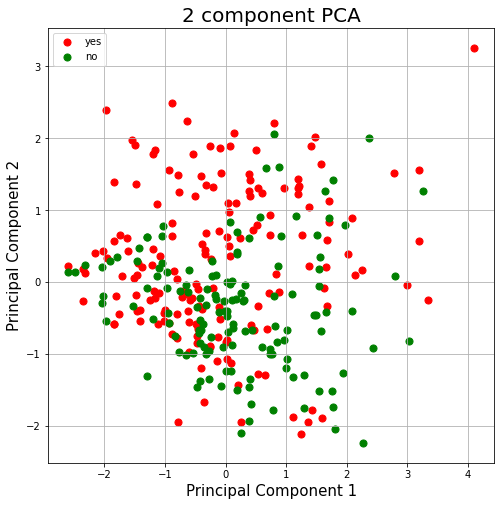

In [19]:
import matplotlib.pyplot as plt

#CHANGE THE ONES AND ZEROS TO YES OR NO


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['yes', 'no']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [20]:
pca.explained_variance_ratio_

array([0.37438969, 0.25299996])

In [1]:
df2.to_csv(r'C:\Users\User\Desktop\School stuff\Capstone\Personal Dataset\Cleaned heart.csv', index = False)

NameError: name 'df2' is not defined